![Logo Chanel](https://puls-img.chanel.com/c_limit,w_960/q_auto:good,dpr_auto,f_auto/1676976259247-8843363975198visuelboutiquedesktopsabhubjpg_900x2880.jpg)

# Projet 1 : Chanel

### Plan du projet - Prédiction des prix des produits Chanel Singapour

#### 1. Introduction
##### Contexte

Chanel, fondée en 1910 par Coco Chanel, est une maison française de luxe reconnue pour sa haute couture, son prêt-à-porter, ses accessoires et ses parfums. Dirigée par Leena Nair depuis 2022, l’entreprise privée détenue par les frères Wertheimer réalise un chiffre d’affaires de 18,7 milliards de dollars en 2024 et emploie environ 37 000 personnes dans le monde.

Dans le luxe, la fixation des prix reflète l’image de la marque et la perception des consommateurs : chaque produit Chanel est une œuvre d’art, et son prix doit en témoigner.

Chanel est également présente à l’international, et Singapour constitue un marché clé en Asie pour la marque. La ville-État accueille plusieurs boutiques Chanel proposant l’ensemble des gammes, du prêt-à-porter aux accessoires et parfums. Les prix à Singapour reflètent à la fois les standards du luxe international et les particularités du marché local.

Singapour est un marché clé pour le luxe en Asie, avec une forte demande pour la mode, les accessoires et la beauté. La ville attire de nombreux consommateurs fortunés et touristes, et offre un environnement stable et stratégique pour les marques internationales comme Chanel. Les achats combinent boutiques physiques et plateformes en ligne, reflétant les tendances modernes du marché du luxe.


##### Objectif du projet

L’objectif de ce projet est de prédire le prix des produits Chanel en fonction de leurs caractéristiques, telles que la catégorie (bijoux, mode, parfum…), le type de produit ou d’autres attributs disponibles dans le dataset.

Cette analyse permettra de mieux comprendre les facteurs qui influencent le prix et de créer un modèle de régression linéaire capable d’estimer la valeur d’un produit avec un niveau de précision raisonnable.

##### Dataset

Le dataset utilisé provient de Hugging Face et contient 971 produits Chanel vendus à Singapour. Il inclut des informations détaillées sur chaque produit, telles que :

- brand : marque (Chanel)

- category1_code, category2_code, category3_code : catégories des produits (ex. Fashion, Jewelry, Handbags…)

- product_code et title : identifiants et nom du produit

- price, full_price : prix actuel et prix initial

- currency_code : devise (SGD pour dollar de Singapour)

- itemurl, imageurl : liens vers le produit et l’image

- flg_discount : indicateur de remise

Ce dataset permet de prédire le prix des produits en fonction de leurs caractéristiques principales (catégorie, type, matériaux, etc.) et de tester un modèle de régression linéaire.

- **Problématique** : 
> Comment prédire de manière fiable le prix d’un produit Chanel (bijoux, mode, parfum, accessoires…) en utilisant ses caractéristiques principales, telles que la catégorie, le type de produit ou d’autres attributs disponibles dans le dataset ?

Cette question guide le projet et permet de structurer l’analyse, le prétraitement des données et la modélisation avec la régression linéaire.

In [248]:
# INSTALLATION

# !pip install pandas
# !pip install pyarrow
# !pip install fastparquet
# !pip install datasets
# !pip install scikit-learn
# !pip install matplotlib
# !pip install seaborn

In [249]:
from datasets import load_dataset
import pandas as pd

# Charger depuis Hugging Face
ds = load_dataset("DBQ/Chanel.Product.prices.Singapore", split="train")

# Convertir en DataFrame pandas
datas = ds.to_pandas()

#### 2. Analyse exploratoire des données (EDA)
- **Compréhension des données** : 
    - Types de variables (numériques, catégorielles).
    - Valeurs manquantes, doublons.

- **Statistiques descriptives** : Moyenne, médiane, distribution des prix par catégorie de produit.

- Visualisations :
    - Histogramme des prix.
    - Boîtes à moustaches par catégorie.
    - Corrélation entre les caractéristiques et le prix.


In [250]:
# Apercu des premieres lignes
print(datas.head())

# Types de variables
print(datas.dtypes)

# Valeurs manquantes
print(datas.isnull().sum())

# Doublons
print(datas.duplicated().sum())

  website_name competence_date country_code currency_code   brand  \
0       Chanel      2023-11-17          SGP           SGD  CHANEL   
1       Chanel      2023-11-17          SGP           SGD  CHANEL   
2       Chanel      2023-11-17          SGP           SGD  CHANEL   
3       Chanel      2023-11-17          SGP           SGD  CHANEL   
4       Chanel      2023-11-17          SGP           SGD  CHANEL   

  category1_code            category2_code category3_code   product_code  \
0        FASHION             READY-TO-WEAR           N.A.  PP75211V66913   
1        FASHION             READY-TO-WEAR           N.A.  PP75222V67022   
2        FASHION             READY-TO-WEAR           N.A.  PP75251V66859   
3        FASHION             READY-TO-WEAR           N.A.  PP75254C66790   
4        JEWELRY  SOUS LE SIGNE DU LION HJ           N.A.        PJ60428   

                             title  \
0                Silk Crepe  Black   
1  Tweed & Imitation Pearls  Black   
2      Printed

In [251]:
print(datas.isnull().sum())

website_name       0
competence_date    0
country_code       0
currency_code      0
brand              0
category1_code     0
category2_code     1
category3_code     0
product_code       0
title              0
itemurl            0
imageurl           0
full_price         0
price              0
full_price_eur     0
price_eur          0
flg_discount       0
dtype: int64


In [252]:
print(datas.dtypes)

website_name        object
competence_date     object
country_code        object
currency_code       object
brand               object
category1_code      object
category2_code      object
category3_code      object
product_code        object
title               object
itemurl             object
imageurl            object
full_price         float64
price              float64
full_price_eur     float64
price_eur          float64
flg_discount         int64
dtype: object


In [253]:
from IPython.display import display

# Affichage interactif du tableau
display(datas.head(10))


,website_name,competence_date,country_code,currency_code,brand,category1_code,category2_code,category3_code,product_code,title,itemurl,imageurl,full_price,price,full_price_eur,price_eur,flg_discount
0,Chanel,2023-11-17,SGP,SGD,CHANEL,FASHION,READY-TO-WEAR,N.A.,PP75211V66913,Silk Crepe Black,https://www.chanel.com/sg/fashion/p/P75211V669...,https://res.cloudinary.com/dwayrkp5z/image/fet...,8110.0,8110.0,5543.40,5543.40,0
1,Chanel,2023-11-17,SGP,SGD,CHANEL,FASHION,READY-TO-WEAR,N.A.,PP75222V67022,Tweed & Imitation Pearls Black,https://www.chanel.com/sg/fashion/p/P75222V670...,https://res.cloudinary.com/dwayrkp5z/image/fet...,14940.0,14940.0,10211.89,10211.89,0
2,Chanel,2023-11-17,SGP,SGD,CHANEL,FASHION,READY-TO-WEAR,N.A.,PP75251V66859,Printed Denim Blue & White,https://www.chanel.com/sg/fashion/p/P75251V668...,https://res.cloudinary.com/dwayrkp5z/image/fet...,3150.0,3150.0,2153.11,2153.11,0
3,Chanel,2023-11-17,SGP,SGD,CHANEL,FASHION,READY-TO-WEAR,N.A.,PP75254C66790,Calfskin & Coated Lace Black,https://www.chanel.com/sg/fashion/p/P75254C667...,https://res.cloudinary.com/dwayrkp5z/image/fet...,18760.0,18760.0,12822.96,12822.96,0
4,Chanel,2023-11-17,SGP,SGD,CHANEL,JEWELRY,SOUS LE SIGNE DU LION HJ,N.A.,PJ60428,18K white gold diamonds,https://www.chanel.com/sg/fine-jewellery/p/J60...,https://res.cloudinary.com/dwayrkp5z/image/fet...,83400.0,83400.0,57006.15,57006.15,0
5,Chanel,2023-11-17,SGP,SGD,CHANEL,JEWELRY,EARRINGS,N.A.,PJ62679,18K white gold diamonds,https://www.chanel.com/sg/fine-jewellery/p/J62...,https://res.cloudinary.com/dwayrkp5z/image/fet...,75400.0,75400.0,51537.93,51537.93,0
6,Chanel,2023-11-17,SGP,SGD,CHANEL,JEWELRY,L'ESPRIT DU LION,N.A.,PJ62826,18K white gold diamonds,https://www.chanel.com/sg/fine-jewellery/p/J62...,https://res.cloudinary.com/dwayrkp5z/image/fet...,99300.0,99300.0,67874.23,67874.23,0
7,Chanel,2023-11-17,SGP,SGD,CHANEL,FRAGRANCE,MEN,N.A.,PP102440,LES EAUX DE CHANEL – EAU DE TOILETTE SPRAY,https://www.chanel.com/sg/fragrance/p/102440/p...,https://res.cloudinary.com/dwayrkp5z/image/fet...,226.0,226.0,154.47,154.47,0
8,Chanel,2023-11-17,SGP,SGD,CHANEL,FRAGRANCE,MEN,N.A.,PP107120,PARFUM TWIST AND SPRAY,https://www.chanel.com/sg/fragrance/p/107120/b...,https://res.cloudinary.com/dwayrkp5z/image/fet...,210.0,210.0,143.54,143.54,0
9,Chanel,2023-11-17,SGP,SGD,CHANEL,FRAGRANCE,MEN,N.A.,PP107580,3-IN-1 MOISTURIZER,https://www.chanel.com/sg/fragrance/p/107580/b...,https://res.cloudinary.com/dwayrkp5z/image/fet...,92.0,92.0,62.88,62.88,0


In [254]:
# Statistiques descriptives pour les variables numériques
print(datas[['price', 'full_price']].describe())

# Prix moyen et médian par catégorie principale
prix_par_categorie = datas.groupby('category1_code')['price'].agg(['mean', 'median'])
print(prix_par_categorie)


               price     full_price
count     971.000000     971.000000
mean    11037.121164   11037.121164
std     27062.131936   27062.131936
min        28.000000      28.000000
25%       211.000000     211.000000
50%      1580.000000    1580.000000
75%     10020.000000   10020.000000
max    227600.000000  227600.000000
                        mean   median
category1_code                       
EYEWEAR           831.458173    720.0
FASHION          6577.500000   5155.0
FRAGRANCE         236.677019    201.0
JEWELRY         32691.450777  13650.0
MAKEUP             77.920792     67.0
SKINCARE          229.145833    148.0
WATCHES         29230.208333  13525.0


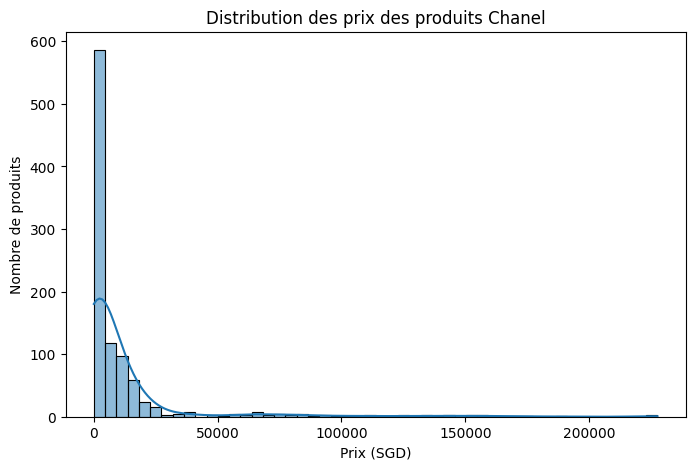

In [255]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.histplot(datas['price'], bins=50, kde=True)
plt.title("Distribution des prix des produits Chanel")
plt.xlabel("Prix (SGD)")
plt.ylabel("Nombre de produits")
plt.show()


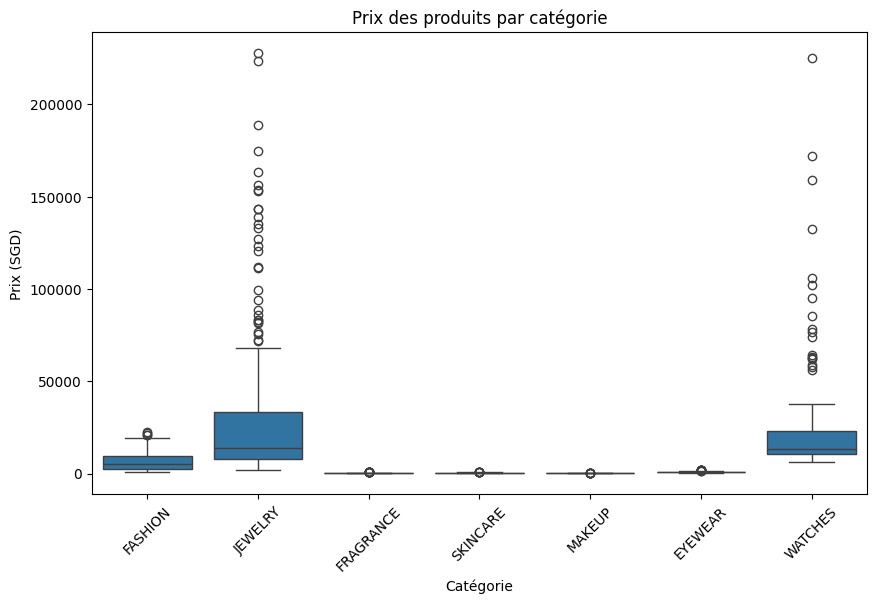

In [256]:
plt.figure(figsize=(10,6))
sns.boxplot(x='category1_code', y='price', data=datas)
plt.title("Prix des produits par catégorie")
plt.xlabel("Catégorie")
plt.ylabel("Prix (SGD)")
plt.xticks(rotation=45)
plt.show()


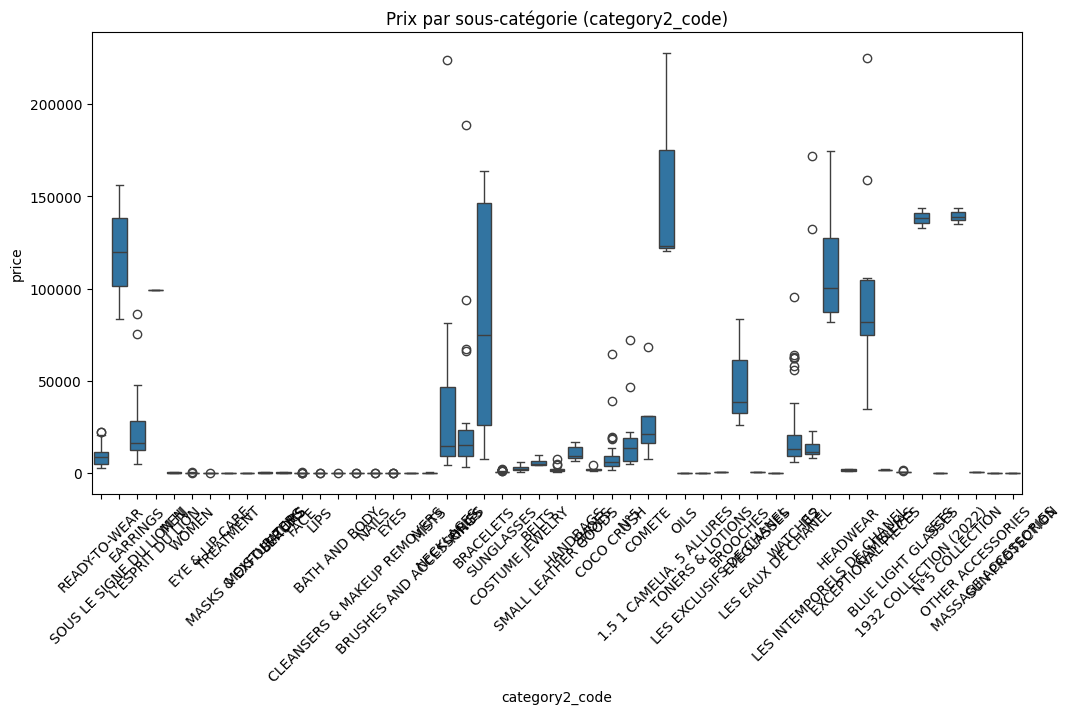

In [257]:
plt.figure(figsize=(12,6))
sns.boxplot(x='category2_code', y='price', data=datas)
plt.title("Prix par sous-catégorie (category2_code)")
plt.xticks(rotation=45)
plt.show()

In [258]:
# Nombre de produits par sous-catégorie
print(datas['category1_code'].value_counts())


category1_code
FASHION      220
JEWELRY      193
FRAGRANCE    161
EYEWEAR      104
MAKEUP       101
SKINCARE      96
WATCHES       96
Name: count, dtype: int64


In [259]:
# Nombre de produits par sous-catégorie
print(datas['category2_code'].value_counts())


category2_code
READY-TO-WEAR                  99
SUNGLASSES                     82
WOMEN                          65
MEN                            62
COSTUME JEWELRY                61
WATCHES                        60
COCO CRUSH                     56
FACE                           43
RINGS                          35
BATH AND BODY                  32
MOISTURIZERS                   31
NECKLACES                      30
HANDBAGS                       28
EYES                           27
J12                            26
EARRINGS                       24
BLUE LIGHT GLASSES             21
BRUSHES AND ACCESSORIES        19
N°5                            15
SMALL LEATHER GOODS            14
LIPS                           14
SERUMS                         11
TONERS & LOTIONS               10
EXCEPTIONAL PIECES             10
BRACELETS                      10
CLEANSERS & MAKEUP REMOVERS    10
SHOES                           9
NAILS                           7
MASKS & EXFOLIATORS             7

In [260]:
# Moyenne et médiane des prix par category2_code
prix_par_sous_categorie = datas.groupby('category1_code')['price'].agg(['mean', 'median'])
print(prix_par_sous_categorie)


                        mean   median
category1_code                       
EYEWEAR           831.458173    720.0
FASHION          6577.500000   5155.0
FRAGRANCE         236.677019    201.0
JEWELRY         32691.450777  13650.0
MAKEUP             77.920792     67.0
SKINCARE          229.145833    148.0
WATCHES         29230.208333  13525.0


In [261]:
# Moyenne et médiane des prix par category2_code
prix_par_sous_categorie = datas.groupby('category2_code')['price'].agg(['mean', 'median'])
print(prix_par_sous_categorie)


                                      mean    median
category2_code                                      
1.5 1 CAMELIA. 5 ALLURES     157033.333333  123100.0
1932 COLLECTION (2022)       138300.000000  138300.0
BATH AND BODY                    95.562500      92.5
BELTS                          5982.500000    4980.0
BLUE LIGHT GLASSES              746.983810     680.0
BRACELETS                     83290.000000   75050.0
BROOCHES                      49350.000000   38750.0
BRUSHES AND ACCESSORIES          73.894737      85.0
CAMELLIAS                      1765.000000    1765.0
CLEANSERS & MAKEUP REMOVERS      83.800000      73.5
COCO CRUSH                     8733.928571    5900.0
COMETE                        28910.000000   21450.0
COSTUME JEWELRY                2750.655738    2370.0
EARRINGS                      24287.500000   16575.0
EXCEPTIONAL PIECES            99930.000000   81650.0
EYE & LIP CARE                  143.800000     107.0
EYEGLASSES                      480.000000    

            price  full_price
price         1.0         1.0
full_price    1.0         1.0


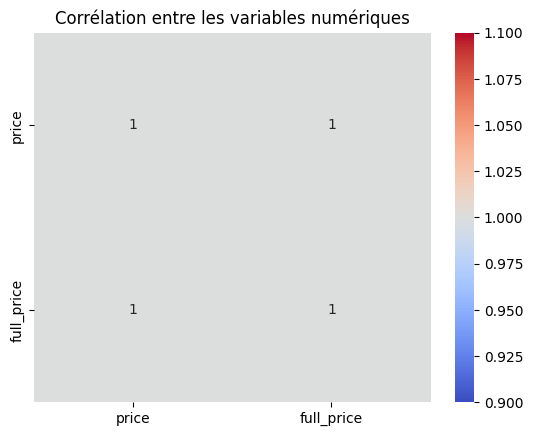

In [262]:
corr = datas[['price', 'full_price']].corr()
print(corr)

sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Corrélation entre les variables numériques")
plt.show()


**Remarques après EDA** : 
Les prix des produits Chanel à Singapour varient fortement selon la catégorie :

- JEWELRY (~32 700 SGD / 23 900 USD) et WATCHES (~29 200 SGD / 21 300 USD) sont les plus chers.

- FASHION (~6 600 SGD / 4 800 USD) est intermédiaire.

- FRAGRANCE, MAKEUP, SKINCARE < 250 SGD (~180 USD) sont beaucoup plus abordables.

Les sous-catégories spécifiques ou éditions limitées expliquent les valeurs extrêmes.
Pour la régression linéaire, la catégorie principale est essentielle, les sous-catégories peuvent être encodées si elles sont fréquentes, et un log-transform du prix est conseillé pour réduire l’effet des outliers.

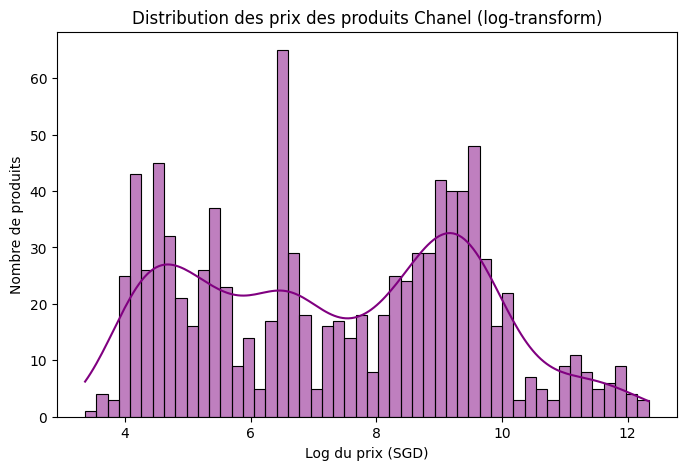

In [263]:
import numpy as np

# Log-transform pour mieux voir les valeurs extrêmes
prices_log = np.log1p(datas['price'])

plt.figure(figsize=(8,5))
sns.histplot(prices_log, bins=50, kde=True, color='purple')
plt.title("Distribution des prix des produits Chanel (log-transform)")
plt.xlabel("Log du prix (SGD)")
plt.ylabel("Nombre de produits")
plt.show()

-----------

#### 3. Prétraitement des données 


- **Nettoyage des données**: Suppression des doublons, gestion des valeurs manquantes.

je remarque que Category2_code a 1 valeur manquante
et Category3_code est remplis de N.A. 
De plus, les autres colonnes ne son pas pertinentes et enfin il faut séparer le y car c'est ce qu'on va predire

In [264]:
datas['category2_code'] = datas['category2_code'].fillna('Other')
print(datas.isnull().sum())


website_name       0
competence_date    0
country_code       0
currency_code      0
brand              0
category1_code     0
category2_code     0
category3_code     0
product_code       0
title              0
itemurl            0
imageurl           0
full_price         0
price              0
full_price_eur     0
price_eur          0
flg_discount       0
dtype: int64


In [265]:
datas = datas.drop_duplicates()

print(datas.duplicated().sum())

0


In [266]:
# Les features (X) non pertinents

X = datas.drop(columns=['price', 'price_eur','category3_code','country_code', 'currency_code', 'full_price', 
                            'full_price_eur', 'competence_date', 'brand', 'product_code',
                            'title', 'itemurl', 'imageurl', 'flg_discount',
                            'website_name'])


# Apercu des premieres lignes
display(X.head())

,category1_code,category2_code
0,FASHION,READY-TO-WEAR
1,FASHION,READY-TO-WEAR
2,FASHION,READY-TO-WEAR
3,FASHION,READY-TO-WEAR
4,JEWELRY,SOUS LE SIGNE DU LION HJ


In [267]:
# On isole nos Y

# Cible
y_sgd = datas['price'] 
y_eur = datas['price_eur']

display(y_eur.head())
display(y_sgd.head())

0     5543.40
1    10211.89
2     2153.11
3    12822.96
4    57006.15
Name: price_eur, dtype: float64

0     8110.0
1    14940.0
2     3150.0
3    18760.0
4    83400.0
Name: price, dtype: float64

In [268]:
# Copier X pour ajouter les features dérivées
X_fe = X.copy()

# High-end products : JEWELRY + WATCHES
X_fe['is_high_end'] = X_fe['category1_code'].apply(lambda x: 1 if x in ['JEWELRY', 'WATCHES'] else 0)

# Beauty products : SKINCARE + MAKEUP + FRAGRANCE
X_fe['is_beauty'] = X_fe['category1_code'].apply(lambda x: 1 if x in ['SKINCARE', 'MAKEUP', 'FRAGRANCE'] else 0)

# Fashion : FASHION
X_fe['is_fashion'] = X_fe['category1_code'].apply(lambda x: 1 if x == 'FASHION' else 0)

# Eyewear : EYEWEAR
X_fe['is_eyewear'] = X_fe['category1_code'].apply(lambda x: 1 if x == 'EYEWEAR' else 0)

# Vérifier
display(X_fe.head())

,category1_code,category2_code,is_high_end,is_beauty,is_fashion,is_eyewear
0,FASHION,READY-TO-WEAR,0,0,1,0
1,FASHION,READY-TO-WEAR,0,0,1,0
2,FASHION,READY-TO-WEAR,0,0,1,0
3,FASHION,READY-TO-WEAR,0,0,1,0
4,JEWELRY,SOUS LE SIGNE DU LION HJ,1,0,0,0


- Encodage des variables catégorielles : Exemple : One-Hot Encoding pour la catégorie (bijoux, mode, parfum…).

- Feature engineering
- Normalisation / standardisation (si nécessaire pour certaines features). 
- Séparation train/test : Exemple 80% / 20%.